# Telecom Churn Prediction | Neural Network Classifier

## Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf

## Load preprocessed data

In [2]:
df_preprocessed = pd.read_csv('../data/processed/preprocessed_telco.csv')

In [3]:
df_preprocessed.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.013889,0.115423,0.003437,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0.472222,0.385075,0.217564,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.027778,0.354229,0.012453,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0.625000,0.239303,0.211951,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0.027778,0.521891,0.017462,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1


## Independent and Dependent variables

In [4]:
X = df_preprocessed.drop('Churn_Yes', axis=1)
y = df_preprocessed['Churn_Yes']

In [5]:
y.value_counts()

Churn_Yes
0    5174
1    1869
Name: count, dtype: int64

## Converting data to numpy arrays

In [6]:
X = X.values
y = y.values

## Train Test Split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 30)
(1409, 30)
(5634,)
(1409,)


## Hanlde class imbalance 

In [9]:
x_train_sub, x_val, y_train_sub, y_val = train_test_split(
    x_train, y_train, test_size=0.2, stratify=y_train, random_state=42
)

In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
smote = SMOTE(random_state=42)

In [12]:
x_train_res, y_train_res = smote.fit_resample(x_train_sub, y_train_sub)

c:\Users\sanid\VS Projects\Telecom_Churn_Prediction\.venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [13]:
print("Before SMOTE:", x_train_sub.shape)
print("After SMOTE:", x_train_res.shape)

print("\nBefore SMOTE class distribution:\n", pd.Series(y_train_sub).value_counts())
print("\nAfter SMOTE class distribution:\n", pd.Series(y_train_res).value_counts())

Before SMOTE: (4507, 30)
After SMOTE: (6622, 30)

Before SMOTE class distribution:
 0    3311
1    1196
Name: count, dtype: int64

After SMOTE class distribution:
 0    3311
1    3311
Name: count, dtype: int64


In [14]:
print(f"Training set shape: {x_train_res.shape}, {y_train_res.shape}")
print(f"Validation set shape: {x_val.shape}, {y_val.shape}")
print(f"Test set shape: {x_test.shape}, {y_test.shape}")

Training set shape: (6622, 30), (6622,)
Validation set shape: (1127, 30), (1127,)
Test set shape: (1409, 30), (1409,)


## Neural Network Model

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(x_train_res.shape[1],)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='tanh'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

c:\Users\sanid\VS Projects\Telecom_Churn_Prediction\.venv\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

In [17]:
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

In [18]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [19]:
history = model.fit(
    x_train_res,
    y_train_res, 
    epochs=100,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5633 - auc: 0.7038 - loss: 0.6660 - val_accuracy: 0.7675 - val_auc: 0.8313 - val_loss: 0.5420
Epoch 2/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7673 - auc: 0.8336 - loss: 0.5468 - val_accuracy: 0.7737 - val_auc: 0.8409 - val_loss: 0.4753
Epoch 3/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7650 - auc: 0.8412 - loss: 0.4980 - val_accuracy: 0.7711 - val_auc: 0.8423 - val_loss: 0.4656
Epoch 4/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7718 - auc: 0.8497 - loss: 0.4808 - val_accuracy: 0.7604 - val_auc: 0.8431 - val_loss: 0.4783
Epoch 5/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7816 - auc: 0.8558 - loss: 0.4707 - val_accuracy: 0.7533 - val_auc: 0.8438 - val_loss: 0.4910
Epoch 6/100
207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7790 - auc: 0.8576 - loss: 0.4684 - val_accuracy: 0.7693 - val_auc: 0.8434 - val_loss: 0.4696
Epoch 7/100
207/207 ━━━━━━━━━━━━━━

## Plot loss

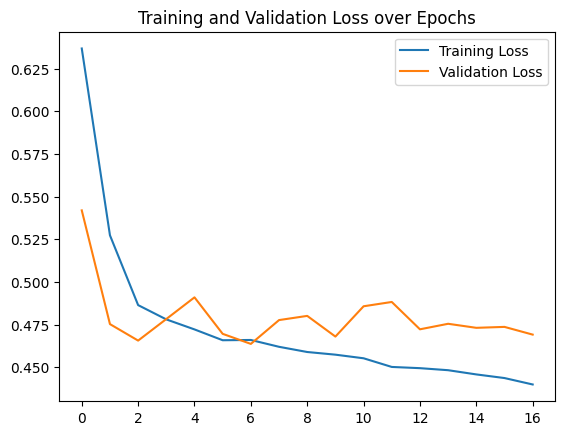

In [20]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')
plt.show()

In [21]:
test_loss, test_acc, test_auc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}\nTest AUC: {test_auc:.4f}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7492 - auc: 0.8295 - loss: 0.4883 
Test Accuracy: 0.7544
Test AUC: 0.8343


In [22]:
y_pred_prob = model.predict(x_test)

y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:

              precision    recall  f1-score   support

    No Churn       0.89      0.76      0.82      1035
       Churn       0.53      0.74      0.61       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.75      0.77      1409



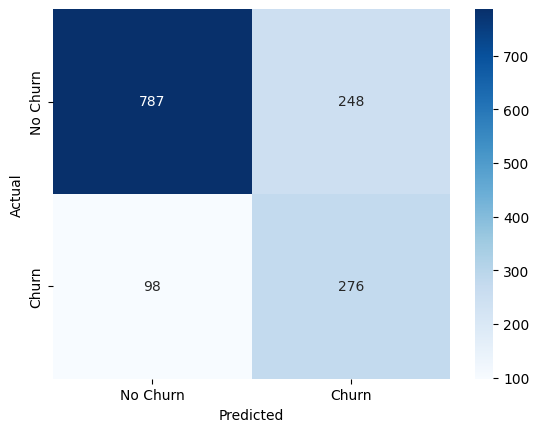

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step
ROC-AUC score: 0.8343447260327055


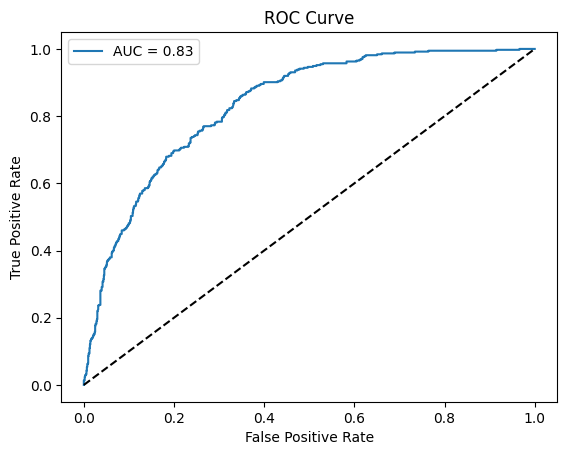

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = model.predict(x_test)
auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC score:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Perform Hyperparameter Tuning using Keras Tuner HyperBand

In [25]:
import keras_tuner as kt

In [29]:
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.InputLayer(shape=(x_train_res.shape[1],)))

    hp_activation = hp.Choice('activation', ['relu', 'selu', 'tanh', 'gelu'])
    hp_layer_1 = hp.Int('layer_1', 1, 1000, step=100)
    hp_layer_2 = hp.Int('layer_2', 1, 1000, step=100)

    hp_learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')

    hp_regularizer = hp.Float('l1', 1e-7, 1e-3, sampling='log')
    hp_dropout = hp.Float('dropout', 0.0, 0.5, step=0.1)

    model.add(tf.keras.layers.Dense(
        units=hp_layer_1,
        activation=hp_activation,
        kernel_regularizer=tf.keras.regularizers.l1(hp_regularizer)
    ))

    model.add(tf.keras.layers.Dropout(hp_dropout))

    model.add(tf.keras.layers.Dense(
        units=hp_layer_2,
        activation=hp_activation,
        kernel_regularizer=tf.keras.regularizers.l1(hp_regularizer)
    ))

    model.add(tf.keras.layers.Dropout(hp_dropout))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )

    return model


In [30]:
objective=kt.Objective("val_auc", direction="max")

In [31]:
tuner = kt.Hyperband(
    build_model,
    objective=objective,
    max_epochs=40,
    factor=3,
    directory='hyperband_tuning',
    project_name='telco_churn_nn_v2_smote'
)

In [32]:
tuner.search(
    x_train_res,
    y_train_res,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)],
    verbose=1
)

Trial 90 Complete [00h 01m 41s]
val_auc: 0.8421651124954224

Best val_auc So Far: 0.8474706411361694
Total elapsed time: 00h 22m 27s


In [33]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [34]:
for hp_name, hp_value in best_hps.values.items():
    print(f"{hp_name}: {hp_value}")

activation: gelu
layer_1: 201
layer_2: 301
learning_rate: 0.004210242896665583
l1: 7.945163168593367e-05
dropout: 0.4
tuner/epochs: 14
tuner/initial_epoch: 5
tuner/bracket: 3
tuner/round: 2
tuner/trial_id: 0039


## Retraining the Neural Network Model on the Best Hyperparameters

In [35]:
model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train_res, y_train_res, 
                    epochs=50, 
                    validation_data=(x_val, y_val),
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7434 - auc: 0.8103 - loss: 0.7335 - val_accuracy: 0.7666 - val_auc: 0.8411 - val_loss: 0.5515
Epoch 2/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7753 - auc: 0.8489 - loss: 0.5495 - val_accuracy: 0.7657 - val_auc: 0.8432 - val_loss: 0.5299
Epoch 3/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7857 - auc: 0.8582 - loss: 0.5159 - val_accuracy: 0.7276 - val_auc: 0.8398 - val_loss: 0.5594
Epoch 4/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7711 - auc: 0.8519 - loss: 0.5168 - val_accuracy: 0.8039 - val_auc: 0.8378 - val_loss: 0.4744
Epoch 5/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7811 - auc: 0.8558 - loss: 0.5092 - val_accuracy: 0.7072 - val_auc: 0.8374 - val_loss: 0.5700
Epoch 6/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7765 - auc: 0.8537 - loss: 0.5092 - val_accuracy: 0.7808 - val_auc: 0.8382 - val_loss: 0.4818
Epoch 7/50
207/207 ━━━━━━━━━━━━━━━━━━━━ 

## Evaluating the New Model

### Plot Loss

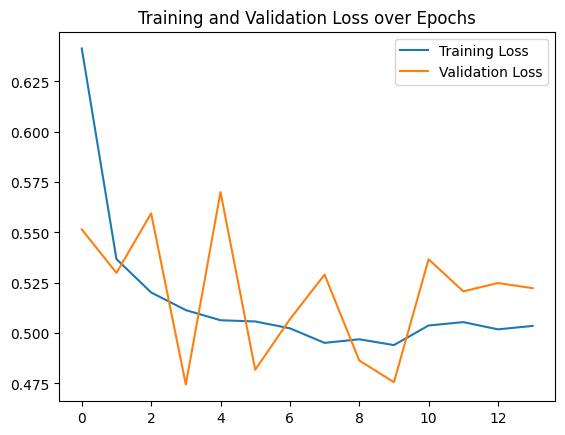

In [36]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss over Epochs')
plt.show()

### Test Accuracy

In [37]:
test_loss, test_acc, test_auc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}\nTest AUC: {test_auc:.4f}")

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7440 - auc: 0.8362 - loss: 0.5299
Test Accuracy: 0.7502
Test AUC: 0.8398


In [38]:
y_pred_prob = model.predict(x_test)

y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report:

              precision    recall  f1-score   support

    No Churn       0.89      0.75      0.82      1035
       Churn       0.52      0.75      0.61       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.79      0.75      0.76      1409



### Confusion Matrix

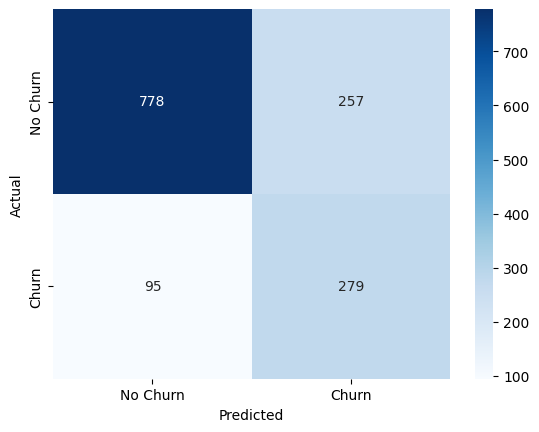

In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### ROC Curve

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step
ROC-AUC score: 0.8397233201581027


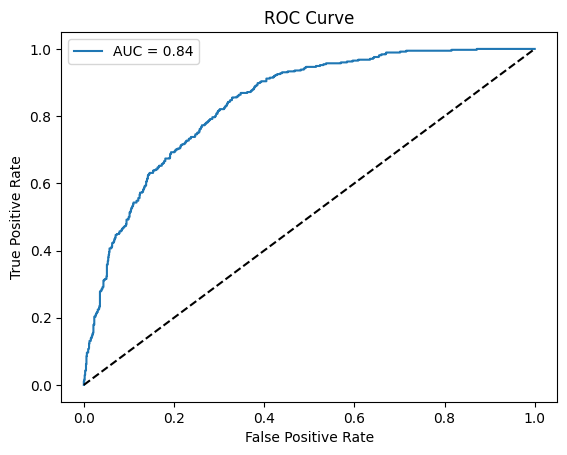

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_prob = model.predict(x_test)
auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC score:", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Random baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [41]:
history.history

{'accuracy': [0.7662337422370911,
  0.7765025496482849,
  0.778465747833252,
  0.776200532913208,
  0.7802778482437134,
  0.7752944827079773,
  0.7808818817138672,
  0.7870733737945557,
  0.783449113368988,
  0.7823920249938965,
  0.7790697813034058,
  0.7780126929283142,
  0.7873753905296326,
  0.7823920249938965],
 'auc': [0.8378345966339111,
  0.851972758769989,
  0.8535878658294678,
  0.8546974658966064,
  0.8565547466278076,
  0.8551933765411377,
  0.856920063495636,
  0.8602406978607178,
  0.8587400913238525,
  0.8609560132026672,
  0.8587775826454163,
  0.8587124347686768,
  0.8614028096199036,
  0.8620365858078003],
 'loss': [0.6413388848304749,
  0.5367323756217957,
  0.5201403498649597,
  0.5113667249679565,
  0.5063412189483643,
  0.5057435631752014,
  0.5023360848426819,
  0.4951000213623047,
  0.49689069390296936,
  0.49400877952575684,
  0.5037422180175781,
  0.5054141283035278,
  0.501819908618927,
  0.5035319924354553],
 'val_accuracy': [0.7666370868682861,
  0.76574975

In [42]:
pd.DataFrame(history.history)

,accuracy,auc,loss,val_accuracy,val_auc,val_loss
0,0.766234,0.837835,0.641339,0.766637,0.841145,0.551457
1,0.776503,0.851973,0.536732,0.765750,0.843209,0.529881
2,0.778466,0.853588,0.520140,0.727595,0.839782,0.559422
3,0.776201,0.854697,0.511367,0.803904,0.837795,0.474439
4,0.780278,0.856555,0.506341,0.707187,0.837399,0.569997
5,0.775294,0.855193,0.505744,0.780834,0.838203,0.481767
6,0.780882,0.856920,0.502336,0.755102,0.843670,0.506839
7,0.787073,0.860241,0.495100,0.745342,0.844342,0.529027
8,0.783449,0.858740,0.496891,0.770186,0.837298,0.486357
9,0.782392,0.860956,0.494009,0.788820,0.843197,0.475563


In [43]:
model

<Sequential name=sequential_1, built=True>